<a href="https://colab.research.google.com/github/Kathryn-Hise/Physics-Articles-ML/blob/main/5_Loop_Neural_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving metadata_and_tfidf_4.csv to metadata_and_tfidf_4.csv


In [ ]:
#filename = 'only_tfidf.csv'
#filename = 'Metadata Reformatted & Validated - Sheet1 (1) (1).csv'
#filename = 'merged_table_better.csv'
filename = 'metadata_and_tfidf_4.csv'
f = pd.read_csv(io.BytesIO(uploaded[filename]),encoding='unicode_escape')
# Dataset is now stored in a Pandas Dataframe

# Processing Array

In [ ]:
#display(f)

In [ ]:
#remove NaN values
f = f.dropna()

#turn into a numpy array
arr = f.to_numpy()
arr = np.delete(arr, 0, 0)
indexmark = len(arr[1])

In [ ]:
#change into feature categories
Y = arr[:,2]
Y = Y.astype(int)
#print(Y)
X = arr[:,-(indexmark - 3):]
X = X.astype(float)
#print(X)
#print(type(X[1][1]))

In [ ]:
#split the data into a 80/20 split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#print(type(X_train[1][4])) #check that its int

# Loop


<Figure size 640x480 with 0 Axes>

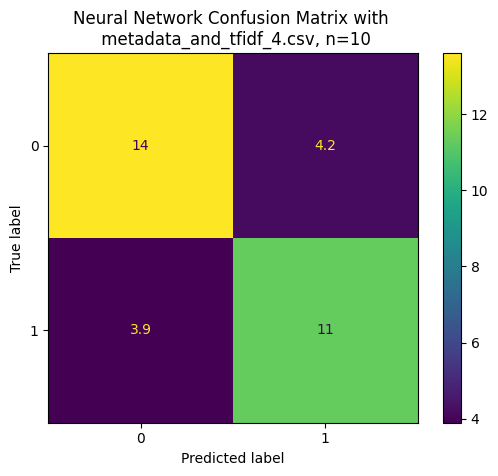

0.7545454545454545


In [ ]:
loopcount = 10
cnf_matrix = [[0,0],[0,0]]
cnf_sum = [[0,0],[0,0]]
for kjh in range(0,loopcount):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  scaler = StandardScaler()
  # Don't cheat - fit only on training data
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  # apply same transformation to test data
  X_test = scaler.transform(X_test)

  max_acc = 0
  best_size = 0

  for i in range(100,200):
      nn = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-4 , hidden_layer_sizes=(i,),max_iter = 1000)
      nn.fit(X_train, Y_train)

      cnf_matrix = confusion_matrix(Y_test, nn.predict(X_test))

      #calcuate the accuracy
      accuracy = 0
      for j in range(len(cnf_matrix)):
          accuracy += cnf_matrix[j][j]
      if accuracy > max_acc:
          max_acc = accuracy
          best_size = i
      #print("Hidden units:",i,"Accuracy:",accuracy/len(Y_test))

  #ordered confusion matrix
  nn = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-4 , hidden_layer_sizes=(best_size,),max_iter = 1000)
  nn.fit(X_train, Y_train)
  #print(nn.classes_)
  #print(confusion_matrix(Y_test, nn.predict(X_test),labels=nn.classes_))

  #Prediction without probability
  #print(nn.predict(X_test))
  cnf_sum = cnf_sum + cnf_matrix

cnf_sum = cnf_sum / loopcount
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_sum)
disp.plot()
plt.title(f"Neural Network Confusion Matrix with \n {filename}, n={loopcount}")
plt.show()

print((cnf_sum[0,0]+cnf_sum[1,1]) / (cnf_sum[0,0]+cnf_sum[1,0]+cnf_sum[0,1]+cnf_sum[1,1]) )

# Training with Neural

In [ ]:
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

max_acc = 0
best_size = 0

for i in range(100,200):
    nn = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-4 , hidden_layer_sizes=(i,),max_iter = 1000)
    nn.fit(X_train, Y_train)

    cnf_matrix = confusion_matrix(Y_test, nn.predict(X_test))

    #calcuate the accuracy
    accuracy = 0
    for j in range(len(cnf_matrix)):
        accuracy += cnf_matrix[j][j]
    if accuracy > max_acc:
        max_acc = accuracy
        best_size = i
    print("Hidden units:",i,"Accuracy:",accuracy/len(Y_test))

  #ordered confusion matrix
  nn = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-4 , hidden_layer_sizes=(best_size,),max_iter = 1000)
  nn.fit(X_train, Y_train)
  #print(nn.classes_)
  #print(confusion_matrix(Y_test, nn.predict(X_test),labels=nn.classes_))

  #Prediction without probability
  #print(nn.predict(X_test))
  joblib.dump(nn,'nn.pkl')

  #Re-use the model
  clf = joblib.load('nn.pkl')
  #print(clf.predict_proba(X_test))

Hidden units: 100 Accuracy: 0.696969696969697
Hidden units: 101 Accuracy: 0.7272727272727273
Hidden units: 102 Accuracy: 0.696969696969697
Hidden units: 103 Accuracy: 0.696969696969697
Hidden units: 104 Accuracy: 0.696969696969697
Hidden units: 105 Accuracy: 0.7878787878787878
Hidden units: 106 Accuracy: 0.7272727272727273
Hidden units: 107 Accuracy: 0.696969696969697
Hidden units: 108 Accuracy: 0.7272727272727273
Hidden units: 109 Accuracy: 0.6666666666666666
Hidden units: 110 Accuracy: 0.7878787878787878
Hidden units: 111 Accuracy: 0.696969696969697
Hidden units: 112 Accuracy: 0.7272727272727273
Hidden units: 113 Accuracy: 0.6666666666666666
Hidden units: 114 Accuracy: 0.696969696969697
Hidden units: 115 Accuracy: 0.696969696969697
Hidden units: 116 Accuracy: 0.6363636363636364
Hidden units: 117 Accuracy: 0.7575757575757576
Hidden units: 118 Accuracy: 0.6666666666666666
Hidden units: 119 Accuracy: 0.7575757575757576
Hidden units: 120 Accuracy: 0.6666666666666666
Hidden units: 121 Acc

In [ ]:
#Saving the model for future uses
joblib.dump(nn,'nn.pkl')

#Re-use the model
clf = joblib.load('nn.pkl')
print(clf.predict_proba(X_test))

[[3.39728246e-14 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [5.99123640e-09 9.99999994e-01]
 [6.44655884e-10 9.99999999e-01]
 [1.00000000e+00 1.26656155e-31]
 [1.00000000e+00 1.78658262e-13]
 [1.30867917e-09 9.99999999e-01]
 [1.89777923e-05 9.99981022e-01]
 [9.07524112e-01 9.24758882e-02]
 [3.39194783e-05 9.99966081e-01]
 [2.07302326e-03 9.97926977e-01]
 [1.94682456e-08 9.99999981e-01]
 [6.32016127e-01 3.67983873e-01]
 [9.99999981e-01 1.88903523e-08]
 [9.99999997e-01 2.85798765e-09]
 [1.01246193e-02 9.89875381e-01]
 [1.55405334e-06 9.99998446e-01]
 [4.18177657e-02 9.58182234e-01]
 [2.36631390e-01 7.63368610e-01]
 [1.00000000e+00 1.71451589e-18]
 [9.98301243e-01 1.69875712e-03]
 [1.70992037e-04 9.99829008e-01]
 [2.56033505e-07 9.99999744e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.36395320e-11]
 [9.88569751e-01 1.14302491e-02]
 [8.11849455e-06 9.99991882e-01]
 [3.33315820e-04 9.99666684e-01]
 [9.99999637e-01 3.62510576e-07]
 [9.899942

<Figure size 640x480 with 0 Axes>

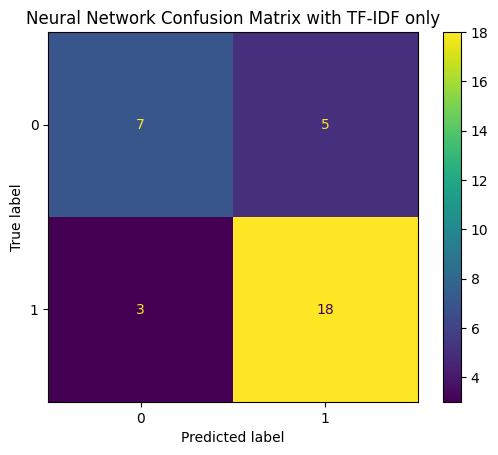

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = clf.predict(X_test)
#cm = confusion_matrix(Y_test, predictions)#, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
#print(neigh.predict_proba([[0.9]]))
#cm.stats() #return oredered Dictionary
#cm.stats()['overall']['Accuracy']
disp.plot()
plt.title("Neural Network Confusion Matrix with TF-IDF only")
plt.show()